# Laboratorio 2 - Parte 2. Modelos no paramétricos - regresión



In [1]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/Intro_ML_2025/master/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources
replicating Labs resources


In [36]:
from local.lib.rlxmoocapi import submit, session
import inspect
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L02.02", varname="student");

logging in as dayana.ramirez@udea.edu.co... please wait

-------------
using course session introml::udea.vir.20252
success!! you are logged in
-------------


In [3]:
#configuración del laboratorio
# Ejecuta esta celda!
from Labs.commons.utils.lab2 import *
_, x, y = part_2()
y = y.reshape(np.size(y), 1)

## Tarea 1: Exploración de datos

Para el problema de regresion usaremos la base de datos 'The California Housing Dataset', cuya descripción [pueden encontrarla aqui](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html). La información ya esta cargada dentro del notebook

In [4]:
print("muestra de los 3 primeros renglones de x:\n", x[0:3, :])
print("muestra de los 3 primeros renglones de y:\n", y[0:3])
print ("Qué información nos brinda el resultado de esta instrucción?", x.shape[0])
print ("Qué información nos brinda el resultado de esta instrucción?", x.shape[1])
print ("Qué información nos brinda el resultado de esta instrucción?", len(np.unique(y)))

muestra de los 3 primeros renglones de x:
 [[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]]
muestra de los 3 primeros renglones de y:
 [[4.526]
 [3.585]
 [3.521]]
Qué información nos brinda el resultado de esta instrucción? 20640
Qué información nos brinda el resultado de esta instrucción? 8
Qué información nos brinda el resultado de esta instrucción? 3842


En los problemas de regresión, es muy útil explorar la distribución de la variable objetivo. Nuestro primer ejercicio consiste en:
1. visualizar un histograma de la variable. Vamos a realizar el histograma con 20 "cajones".
2. Usar el histograma para confirmar como estan distribuidos los datos

Pistas:
1. explorar la documentación de [plt.hist](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html). Maneje los valores por defecto.

**NOTA**
Se quiere incentivar la lecutra de la documentación de las librerías, se debe hacer llamado explícito al parámetro a usar. Ejemplo si se necesita usar el parámetro `density`, se debe llamar como `plt.hist(density=True ....)`

In [34]:
#ejercicio de código
def plot_hist_20(Y):
    """función que grafica el histograma de la variable 'Y'
        teniendo como valor fijo 20 en el parámetro que controla
        el número de "cajones"

        No retorna nada
    """
    import matplotlib.pyplot as plt
    plt.hist(Y, bins=20)
    plt.title('Histograma de la variable objetivo')
    plt.xlabel('Valores de Y')
    plt.ylabel('Frecuencia')


    return

**Registra tu solución en línea**

In [37]:
student.submit_task(namespace=globals(), task_id='T1');

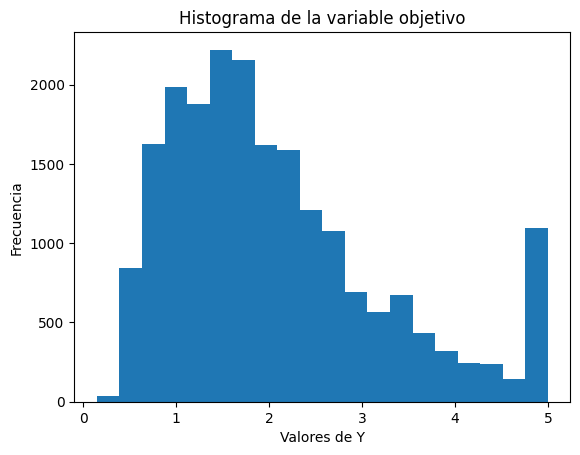

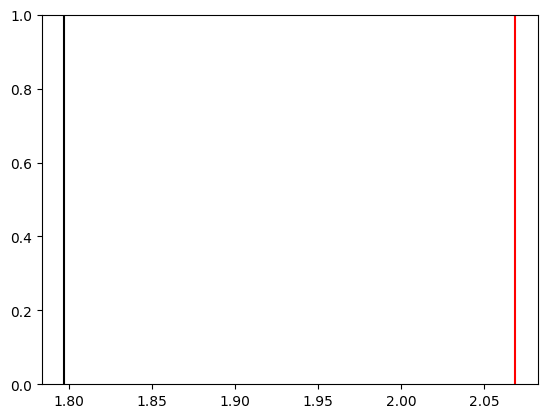

In [7]:
# ver el histograma!
plot_hist_20(y)
# vamos realizar la representacion de la media y mediana
plt.axvline(y.mean(), c = 'r')
plt.axvline(np.median(y), c = 'k')
plt.show()

In [38]:
#@title Pregunta Abierta
#@markdown Evaluando **solo** el histograma, ¿qué tan bien representa la media de y a todo el posible rango de valores de la variable objetivo?
respuesta = "La media se ve afectada por los valores más altos y no representa tan bien el centro de la distribución como lo haría en una distribución simétrica." #@param {type:"string"}

## Tarea 2: K-Vecinos más cercanos para regresión.

Vamos a implementar ahora el modelo KNN para un problema de regresión.

Las mismas pistas de nuestro laboratorio anterior son de utilidad para implementar el algoritmo.

1. Para el cáculo de la distancia entre vectores existen varias opciones:
    1. usar la función la distancia entre matrices `scipy.spatial.distance.cdist`([Ejemplo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html#scipy.spatial.distance.cdist))--esta puede ser usada directamente como `cdist(...)`. Entiende la salida de esta función. Al usarla, se logra un rendimiento superior.
    2. usar la función la distancia euclidiana `scipy.spatial.distance.euclidean`([Ejemplo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html))--pueder acceder a ella directamente como `euclidean`. Aca debe pensar en un algoritmo elemento a elemento, por lo tanto menos eficiente.
2. También serán de utilidad las funciones `np.sort` y `np.argsort`.
3. ¿Cuál es la única diferencia entre el knn para clasificación y regresión? en lugar de la moda, que metodo debemos usar?

In [8]:
#ejercicio de código
def knn_regresion(k, X_train, Y_train, X_test):
    """ Función que implementa el modelo de K-Vecino mas cercanos
        para regresión

    k (int): valor de vecinos a usar
    X_train: es la matriz con las muestras de entrenamiento
    Y_train: es un vector con los valores de salida pra cada una de las muestras de entrenamiento
    X_test: es la matriz con las muestras de validación

    retorna: las estimaciones del modelo KNN para el conjunto X_test
             esta matriz debe tener un shape de [row/muestras de X_test]
             y las distancias de X_test respecto a X_train, estan matrix
             debe tener un shape de [rows de X_test, rows X_train]
             lo que es lo mismo [muestras de X_test, muestras de X_train]
    """

    from scipy.spatial import distance

    distancias = cdist(X_test, X_train, metric='euclidean')
    vecinos_idx = np.argsort(distancias, axis=1)[:, :k]
    Y_est = np.mean(Y_train[vecinos_idx], axis=1)

    #Tener en cuenta que una implementación óptima no requiere ciclos for
    return (Y_est, distancias)

**Registra tu solución en línea**

In [9]:
student.submit_task(namespace=globals(), task_id='T2');

## Tarea 3: Evaluar modelo K-Vecinos

Ahora vamos a probar nuestro algoritmo. Antes de ello, definos la función para calcular el error

In [12]:
def MAPE(Y_est,Y):
    """Mean Absolute Percentage Error para los problemas de regresión
    Y_est: numpy array con los valores estimados
    Y: numpy array con las etiquetas verdaderas
    retorna: mape
    """
    N = np.size(Y)
    epsilon = 1e-10  # Pequeño valor para evitar división por cero
    mape = np.sum(abs((Y_est.reshape(N, 1) - Y.reshape(N, 1)) / (Y.reshape(N, 1) + epsilon))) / N
    return mape

Vamos a crear la función para experimentar.

En el ejercicio de código, se puede observar que usamos nuevamente la funciónes de la libreria **sklearn**:

1. [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) para normalizar.

2. [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Para dividir el conjunto de datos. Entiende como estamos usando esta función y completa el codigo para realizar 5 particiones.

In [10]:
#Ejercicio de código
def experimentar (ks, X, Y):
    """Función que realiza los experimentos con knn usando
       una estrategia de validacion entrenamiento y pruebas

    ks: List[int/float] lista con los valores de k-vecinos a usar
    X: matriz de numpy conjunto con muestras y caracteristicas
    Y: vector de numpy con los valores a predecir
    retorna: dataframe con los resultados, debe contener las siguientes columnas:
        - los k-vecinos, el error-mape medio de prueba, la desviacion estandar del error-mape
    """

    resultados = pd.DataFrame()
    idx = 0
    # iteramos sobre la lista de k's
    for k in ks:

        # iteramos para validar
        # sobre las particiones
        # ¿que numero debemos asignar para lograr las particiones?
        for j in range(5):
            # dividimos usando la función
            Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=j)
            scaler = StandardScaler()
            scaler.fit(Xtrain)
            Xtrain= scaler.transform(Xtrain)
            Xtest = scaler.transform(Xtest)

            Yest, _ = knn_regresion(k, Xtrain, Ytrain, Xtest)
            errorTest = MAPE(Yest, Ytest)

            resultados.loc[idx,'k-vecinos'] = k
            resultados.loc[idx,'error de prueba'] = errorTest
            #asignamos la particion
            resultados.loc[idx, 'particion'] = j
            idx+=1

    return (resultados)

**Registra tu solución en línea**

In [13]:
student.submit_task(namespace=globals(), task_id='T3');

Ahora ejecuta los experimentos con k = 2,3,4

In [14]:
resultados = experimentar ([2,3,4], x, y)
resultados

,k-vecinos,error de prueba,particion
0,2.0,0.255543,0.0
1,2.0,0.262266,1.0
2,2.0,0.257779,2.0
3,2.0,0.253148,3.0
4,2.0,0.256562,4.0
5,3.0,0.243795,0.0
6,3.0,0.247859,1.0
7,3.0,0.247124,2.0
8,3.0,0.245474,3.0
9,3.0,0.245114,4.0


## Tarea 4: Ventana de Parzen

Ahora, igualmente, vamos aplicar ventana de parzen para resolver el problema de regresión.

$$f({\bf{x}}^*) = \frac{1}{N h^d} \sum_{i=1}^{N} K(u_i), \;\; u_i = \frac{d({\bf{x}}^*,{\bf{x}}_i)}{h}$$

En la siguiente celda se define la función para un $K(u_i)$ gaussiano y se realiza la sugerencia para estimar el termino $ \sum_{i=1}^{N} K(u_i)$, siendo $\;\; u_i = \frac{d({\bf{x}}^*,{\bf{x}}_i)}{h}$.

Observa y entiende esta última función y sus argumentos. Recordando que para regresión, debemos usar la relación de **Nadaraya_Watson**.

$$y^* = \frac{\sum_{i=1}^N K(u_i)y_i}{\sum_{i=1}^N K(u_i)} $$



In [15]:
def kernel_gaussiano(x):
    return (np.exp((-0.5)*x**2))

def ParzenWindow(x,Data,h,Datay=None):
    from scipy.spatial.distance import euclidean
    """"ventana de parzen
    x: vector con representando una sola muestra
    Data: vector de muestras de entrenamiento
    h: ancho de la ventana de kernel
    Datay: vector con los valores de salida (y), Si no se pasa como argumento,
        se calcula un ventana de parzen sin multiplicar los valores de este vector.
    retorna: el valor de ventana de parzen para una muestra
    """
    h = h
    Ns = Data.shape[0]
    suma = 0
    for k in range(Ns):
        u = euclidean(x,Data[k,:])
        if Datay is None:
            suma += kernel_gaussiano(u/h)
        else:
            suma += kernel_gaussiano(u/h)*Datay[k]
    return suma


Usando las anteriores funciones, completa el código.

In [29]:
#Ejercicio de código
def Nadaraya_Watson(h, X_train, Y_train, X_test):
    """ Función que implementa metodo de ventana de parzen para
        para clasificación

    h (float): ancho de h de la ventana
    X_train: es la matriz con las muestras de entrenamiento
    Y_train: es un vector con los valores de salida pra cada una de las muestras de entrenamiento
    X_test: es la matriz con las muestras de validación

    retorna: - las estimaciones del modelo parzen para el conjunto X_test
              esta matriz debe tener un shape de [row/muestras de X_test]
    """

    Yest = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        numerator = ParzenWindow(X_test[i,:], X_train, h, Y_train)
        denominator = ParzenWindow(X_test[i,:], X_train, h)
        Yest[i] = numerator / (denominator + 1e-10)


    #Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_val, en el mismo orden.
    #Tener en cuenta que una implementación óptima no requiere ciclos for
    return Yest

**Registra tu solución en línea**

In [30]:
student.submit_task(namespace=globals(), task_id='T4');

## Tarea 5: Experimentos con Parzen
En el ejercicio de código, se puede observar que usamos nuevamente la funciónes de la libreria **sklearn**:

1. [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) para normalizar.
2. Y se debe usar la función [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html?highlight=kfold#sklearn.model_selection.KFold) para realizar la validación. Tener en cuenta la documentación para poder completar el código de manera correcta y usar 3 particiones.

In [31]:
def experimentarParzen (hs, X, Y):
    """Función que realiza los experimentos con knn usando
       una estrategia de validacion entrenamiento y pruebas

    hs: List[int/float] lista con los valores de h a usar
    X: matriz de numpy conjunto con muestras y caracteristicas
    Y: vector de numpy con los valores de las etiquetas

    retorna: dataframe con los resultados, debe contener las siguientes columnas:
        - el ancho de ventana,
        - el error medio de prueba
        - la desviacion estandar del error
        - número de promedio en el conjunto de prueba/validacion
    """
    # se usa la función para implementar la estrategia de validación.
    # asgine el valor acorde
    kfolds = KFold(n_splits=3, shuffle=True, random_state=0)
    resultados = pd.DataFrame()
    idx = 0
    # iteramos sobre los valores de hs

    for h in hs:

        #contador para cada particion
        particion = 0
        # asigne el valor al parametro X
        for train, test in kfolds.split(X):

            # como usar train y test ?
            Xtrain = X[train, :]
            Ytrain = Y[train]
            Xtest = X[test, :]
            Ytest = Y[test]
            #normalizamos los datos
            scaler = StandardScaler()
            scaler.fit(Xtrain)
            Xtrain = scaler.transform(Xtrain)
            Xtest = scaler.transform(Xtest)

            Yest = Nadaraya_Watson(h, Xtrain, Ytrain, Xtest)
            errorTest = MAPE(Yest, Ytest)


            resultados.loc[idx,'ancho de ventana'] = h
            resultados.loc[idx,'error de prueba'] = errorTest
            resultados.loc[idx,'particion'] = particion
            idx+=1
            particion+=1
    return (resultados)

**Registra tu solución en línea**

In [32]:
student.submit_task(namespace=globals(), task_id='T5');

In [ ]:
# ejecute para ver los experimentos
hs = [1,1.5 ,2.5, 5, 10]
experimentos_parzen = experimentarParzen(hs, x,y)
experimentos_parzen

/tmp/ipython-input-1520327125.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Yest[i] = numerator / (denominator + 1e-10)


In [ ]:
# para ver el mejor modelo
# vamos a calcular el valor medio
# Y order acorde y observamos
# el primer valor
(experimentos_parzen
 .groupby(['ancho de ventana'], as_index=False)['error en conjunto de prueba'].mean()
 .sort_values(by='error en conjunto de prueba', ascending = True)
 .head(1))

In [39]:
#@title Pregunta Abierta
#@markdown ¿En qué consiste el metodo Silverman bandwidth? Explique brevemente y en sus palabras
respuesta = "Es una regla simple para elegir automáticamente el \"ancho de ventana\" en la estimación de densidad con kernels. Ayuda a encontrar un valor de h que no sea ni muy grande ni muy pequeño, basándose en la dispersión de los datos." #@param {type:"string"}